In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd 

In [2]:
import sys
sys.path.append('/home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/')

In [3]:
# import plastid
# data structure for mapping read alignments to genomic positions
from plastid import BAMGenomeArray, GenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, GFF3_TranscriptAssembler, \
                        Transcript, ThreePrimeMapFactory, CenterMapFactory
import plastid
from plastid.plotting.plots import *
import numpy as np
import os
from Bio import SeqIO
import numpy
import math
import pandas as pd
from scipy import stats
import keegan_analysis_tools as kat
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from scipy.sparse.linalg import lsqr

In [7]:
# Define the path to our Bam files
data_path = "/home/keeganfl/Desktop/Work_Fall_2021/genomes_&_samples/ecol/"
feat_counts_path = "/home/keeganfl/Desktop/Work_Fall_2021/feature_counts/ecol/"
te_path = "/home/keeganfl/Desktop/Work_Fall_2021/data_tables/"
p_site_path = "/home/keeganfl/Desktop/Work_Fall_2021/data_tables/p-site_offsets/ecol/"
gtf_name = "Escherichia_coli_str_k_12_substr_mg1655_gca_000005845.ASM584v2.51.gtf"
count_path = '/home/keeganfl/Desktop/Work_Fall_2021/data_tables/position_counts_codon_resolution/ecol/'
mutation = 'efp'
samp_num = '2'

## Loading up the data files 

In [13]:
# load the transcript annotations from the GTF file.
# GTF2_TranscriptAssembler returns an iterator, so here we convert it to a list.
transcripts = list(GTF2_TranscriptAssembler(open(data_path + gtf_name),return_type=Transcript))

In [14]:
# Remove non-protein coding transcripts from transcripts list. 
protein_coding = []
for transcript in transcripts:
    if transcript.attr['gene_biotype'] == 'protein_coding':
        protein_coding.append(transcript)

In [15]:
# clear up some memory by deleting original transcript list
transcripts.clear()

In [9]:
te_table_mutant = pd.read_csv(te_path + 'ecol_TE_thingy.csv')

In [17]:
data_mutant = kat.load_count_positions(mutation+"_"+samp_num+"_counts.csv",count_path)
data_control = kat.load_count_positions("control" + "_" + samp_num + "_counts.csv", count_path)

In [18]:
# Choosing a gene of interest to calculate the elongation rates of. 
# Get the transcript and vector for the gene of interest.
my_gene = 'cysQ'
my_transcript, my_vec_mutant, my_vec_control, index = kat.find_transcripts(my_gene, 
                                           protein_coding, data_mutant, data_control)

In [31]:
profile = np.array(my_vec_mutant, dtype = "d")
density = float(te_table_mutant[te_table_mutant.Gene == my_gene].TE)

In [32]:
test = {"Density": density, "Profile": profile}

In [33]:
sio.savemat(my_gene + '_test.mat', test)

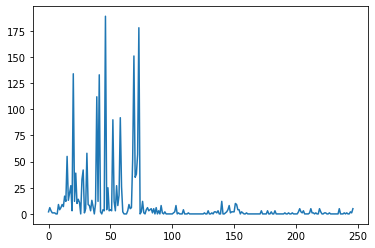

In [20]:
plt.plot(profile)

In [ ]:
my_vec

In [ ]:
# 30-codon sliding window average
window = np.ones(90).astype(float)/90.0
sliding_window_avg = np.convolve(my_vector,window,mode="valid")


# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(my_vector,label="%s counts" % my_transcript.get_name())
plt.plot(sliding_window_avg,label="30 codon average")
plt.xlabel("Position in transcript (5' to 3')")
plt.ylabel("Ribosome counts")

# add outlines at start & stop codons
plt.axvline(my_transcript.cds_start,color="#999999",dashes=[3,2],zorder=-1)
plt.axvline(my_transcript.cds_end,color="#999999",dashes=[3,2],zorder=-1)